In [1]:
import pandas as pd
from core.convert_data import class2numeric, norm
from core.math import mu
import numpy as np
from sklearn.model_selection import train_test_split
from models.near_neigbor import NearNeighbor
from models.bayes import NaiveBayes
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from models.LinearClassifier import LinearClassifier
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/mushrooms.csv")
data = class2numeric(data)

In [3]:
Y = data['class']
X = data.drop(['class'], axis=1)
X = norm(X)

In [4]:
Y = np.array(Y)
X = np.array(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [6]:
model = LinearClassifier(X_train, y_train)

In [7]:
def mar():
    margin = model.margin_(X_train, y_train)
    margin = np.sort(np.array(margin))
    plt.plot(np.sort(margin))

In [8]:
model.weight

array([ 0.13865849, -0.19519716,  0.1867847 , -0.23603201, -0.13674473,
       -0.1769927 , -0.08198131,  0.13599103, -0.22773955,  0.15959566,
       -0.02540778,  0.11089341, -0.11178305, -0.23896824,  0.03664525,
       -0.03502153, -0.14152568,  0.13454794,  0.01011311,  0.11742697,
       -0.13566217,  0.0438065 ])

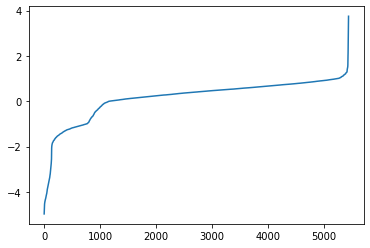

In [9]:
mar()

In [10]:
model.stochastic_gradient(X_train, y_train)
model.weight

array([ 0.13829217, -0.19468149,  0.18629125, -0.23540845, -0.13638347,
       -0.17652511, -0.08176473,  0.13563176, -0.22713791,  0.15917404,
       -0.02534066,  0.11060045, -0.11148773, -0.23833692,  0.03654844,
       -0.03492901, -0.1411518 ,  0.13419248,  0.01008639,  0.11711675,
       -0.13530378,  0.04369077])

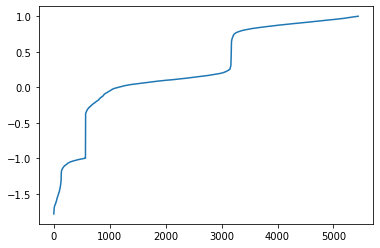

In [15]:
for _ in range(10000):
    model.stochastic_gradient(X_train, y_train, n=5e-3)
mar()